# Lets collect Data

In [1]:
import pandas as pd
import os

In [2]:
#importing the csv file into the jupyter
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#let's check the shape of the dataframe i.e rows*columns
df.shape

(158, 12)

#above output shows that there are 158 rows and 12 columns.

In [4]:
#code for checking the columns name
df.columns 

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


count shows the number of rows present in particular columns.
mean is the average of that particular columns values.
>the mean for the happiness score and Dystopia Residual is quietly more compared to other.
>std stands for standard deviation.
>min is for minimum.
>max is for maximum.

In [6]:
#code for checking datatypes
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# Let's Analyze Data

In [7]:
#importing libraries for graphs and correlation between the data.
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt


In [8]:
df.rename(columns={"Happiness Rank": "HappinessRank", "Happiness Score": "HappinessScore","Standard Error":"StandardError","Economy (GDP per Capita)":"Economy","Trust (Government Corruption)":"Trust","Dystopia Residual":"DystopiaResidual","Health (Life Expectancy)":"Health"},inplace=True)

In [9]:
df.drop(["Country","Region"],axis=1,inplace=True)
df
#we are dropping country and region column because we have to deal with only float values to get target value.

,HappinessRank,HappinessScore,StandardError,Economy,Family,Health,Freedom,Trust,Generosity,DystopiaResidual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


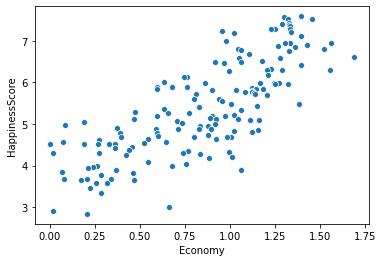

In [10]:
sn.scatterplot(x="Economy",y="HappinessScore",data=df)

# In above scatterplot graph we can observe that as the economy increases the Happiness score increases.

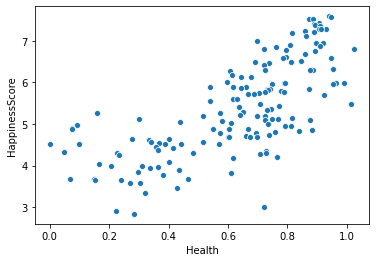

In [11]:
sn.scatterplot(x="Health",y="HappinessScore",data=df)

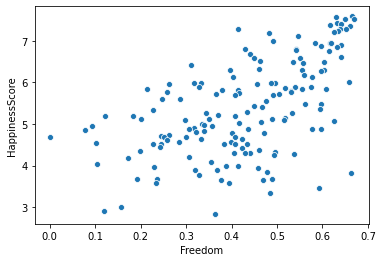

In [12]:
sn.scatterplot(x="Freedom",y="HappinessScore",data=df)


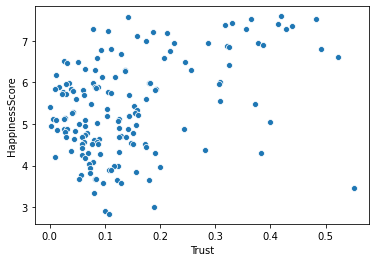

In [13]:
sn.scatterplot(x="Trust",y="HappinessScore",data=df)

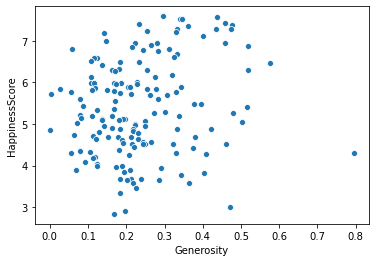

In [14]:
sn.scatterplot(x="Generosity",y="HappinessScore",data=df)

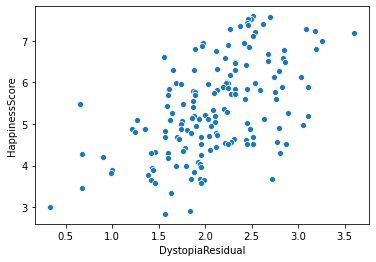

In [15]:
sn.scatterplot(x="DystopiaResidual",y="HappinessScore",data=df)

In [16]:
df.corr()

,HappinessRank,HappinessScore,StandardError,Economy,Family,Health,Freedom,Trust,Generosity,DystopiaResidual
HappinessRank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
HappinessScore,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
StandardError,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
DystopiaResidual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


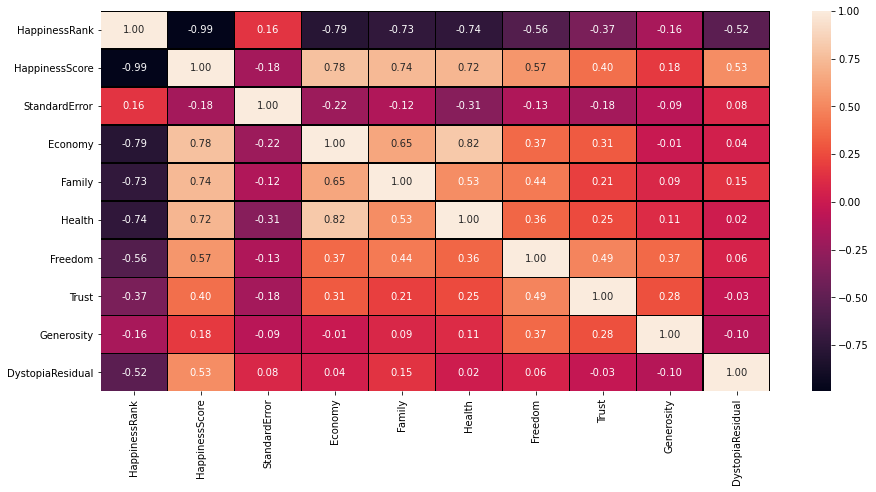

In [17]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor="black",fmt='.2f')

In [18]:
df.isnull().sum()

HappinessRank       0
HappinessScore      0
StandardError       0
Economy             0
Family              0
Health              0
Freedom             0
Trust               0
Generosity          0
DystopiaResidual    0
dtype: int64

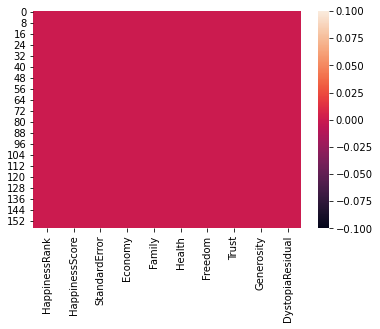

In [19]:
sn.heatmap(df.isnull())

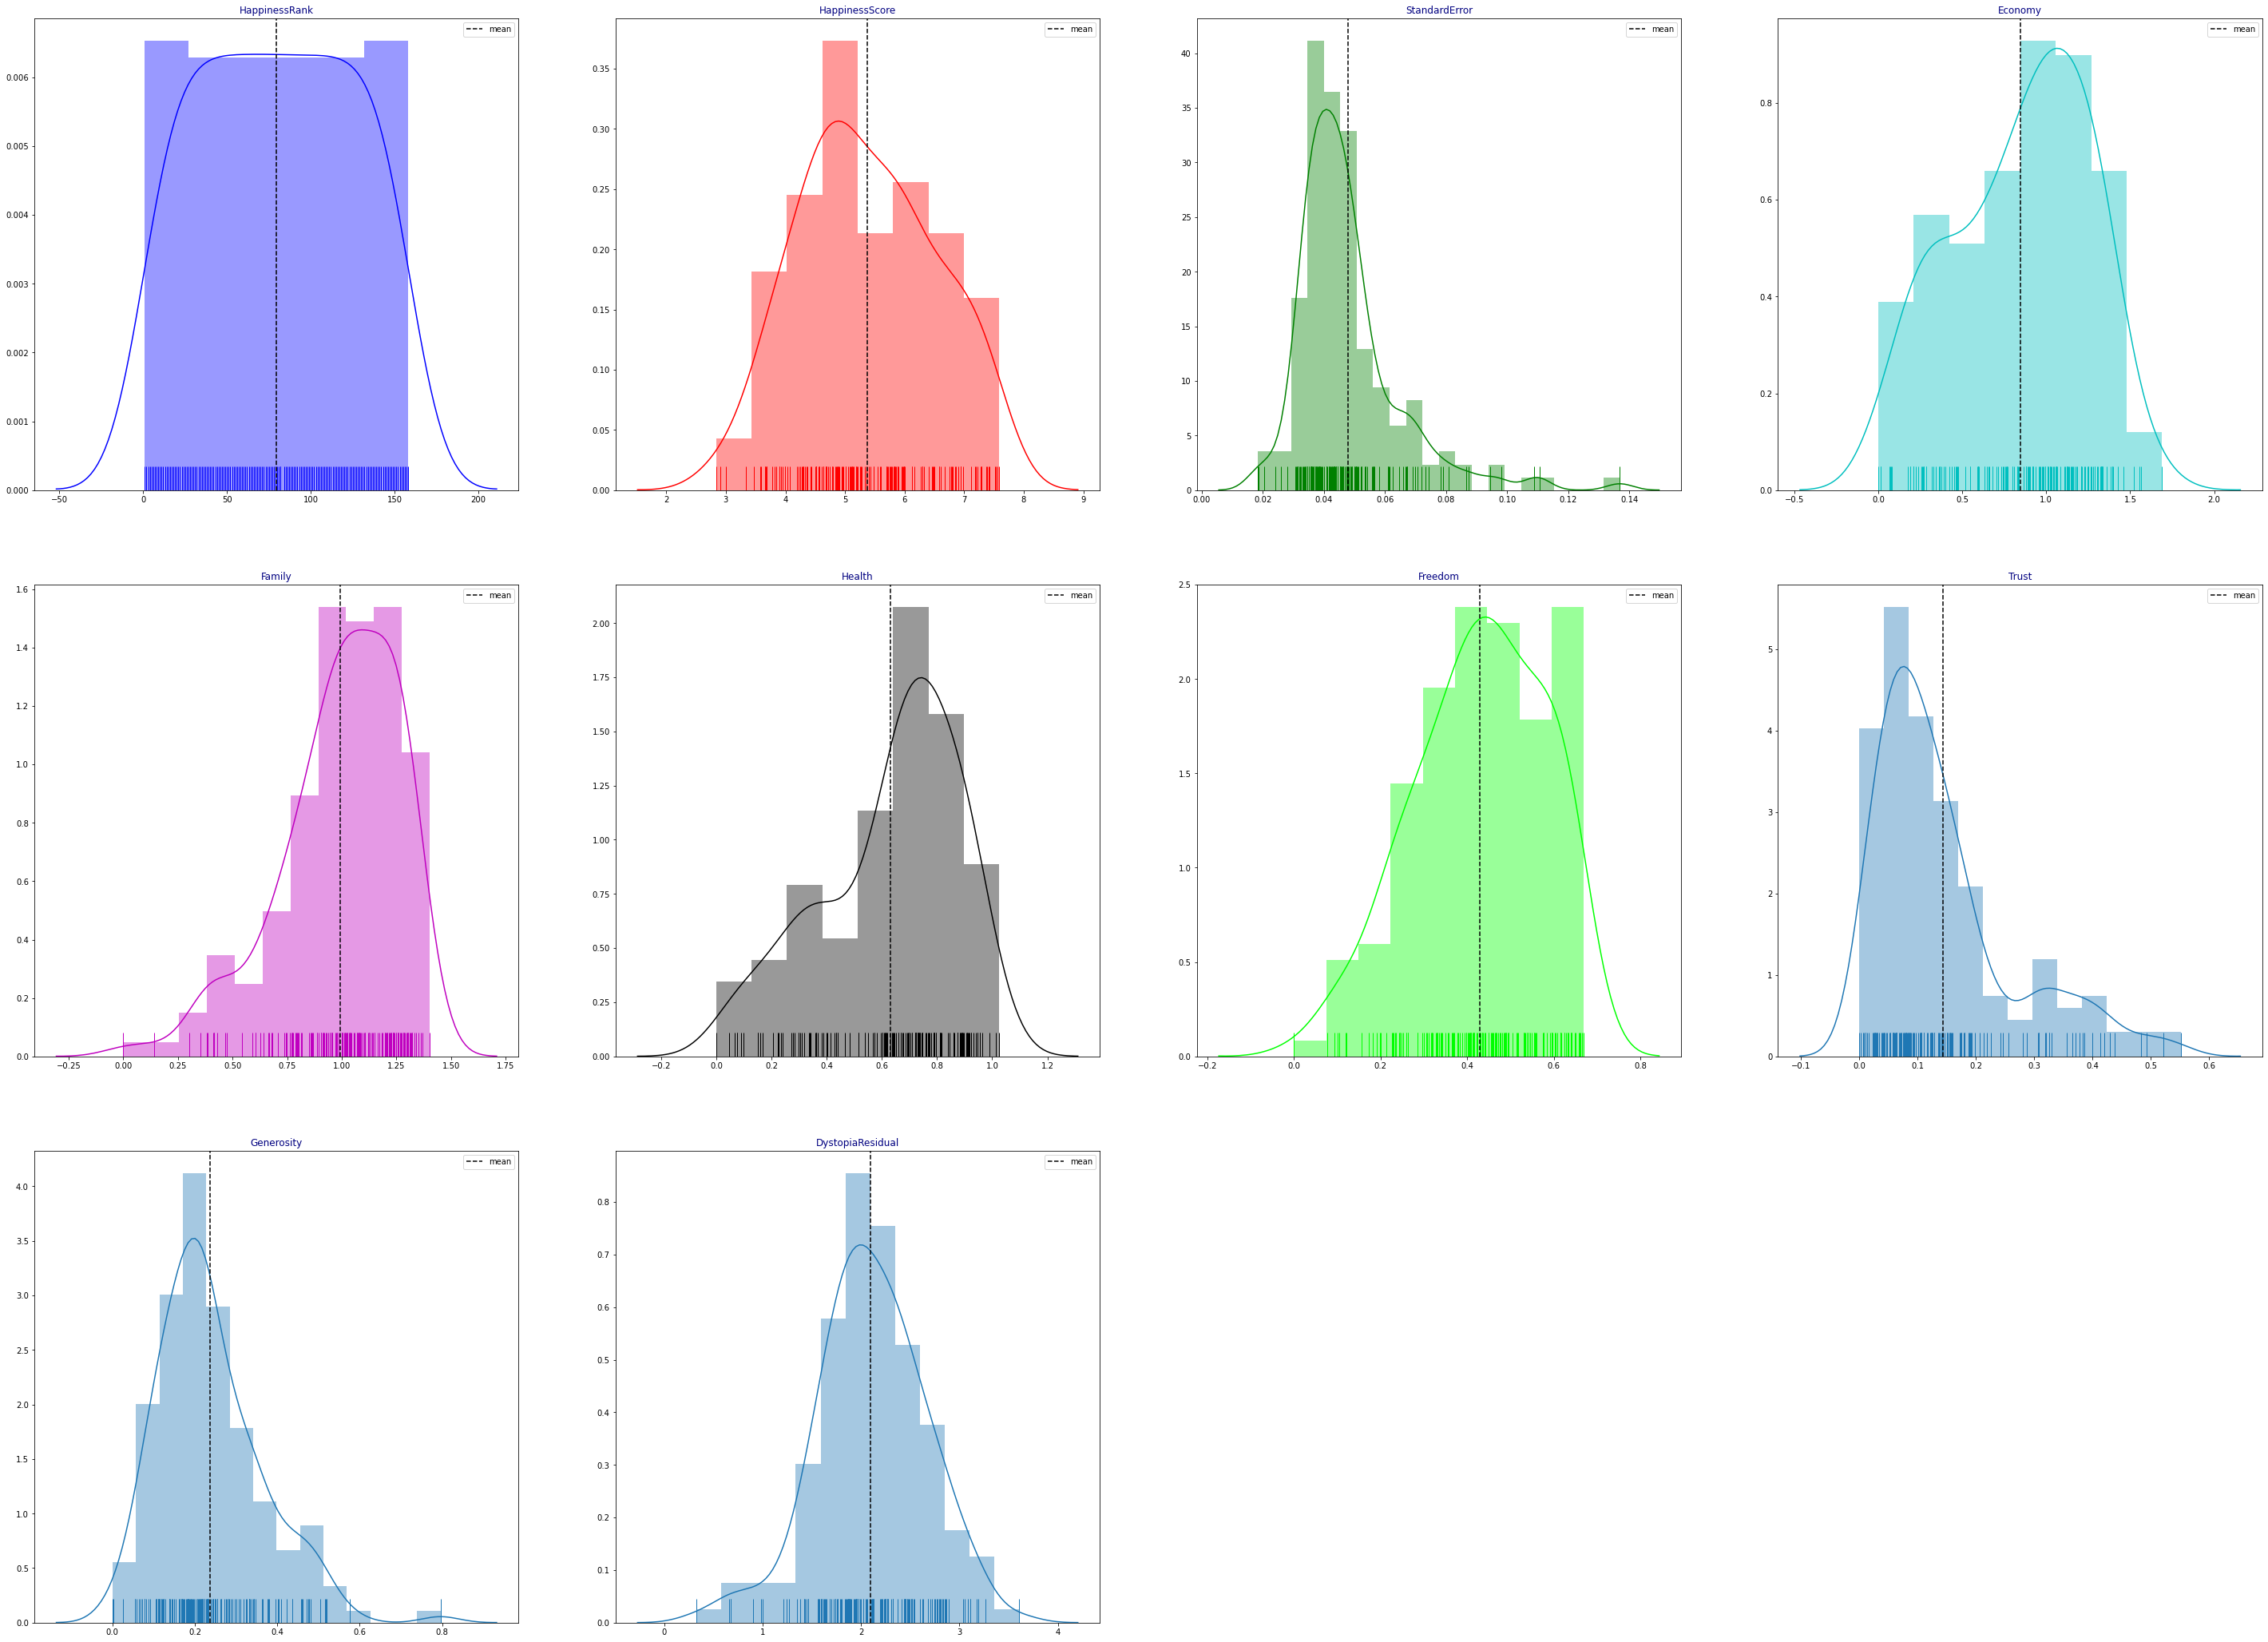

In [20]:
#code to observe the skewness in every column.
import itertools
cols=['HappinessRank', 'HappinessScore','StandardError', 'Economy', 'Family','Health', 'Freedom', 'Trust',
       'Generosity', 'DystopiaResidual']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(50,50))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,4,j+1)
    ax=sn.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F37D9C0820>,
      dtype=object)

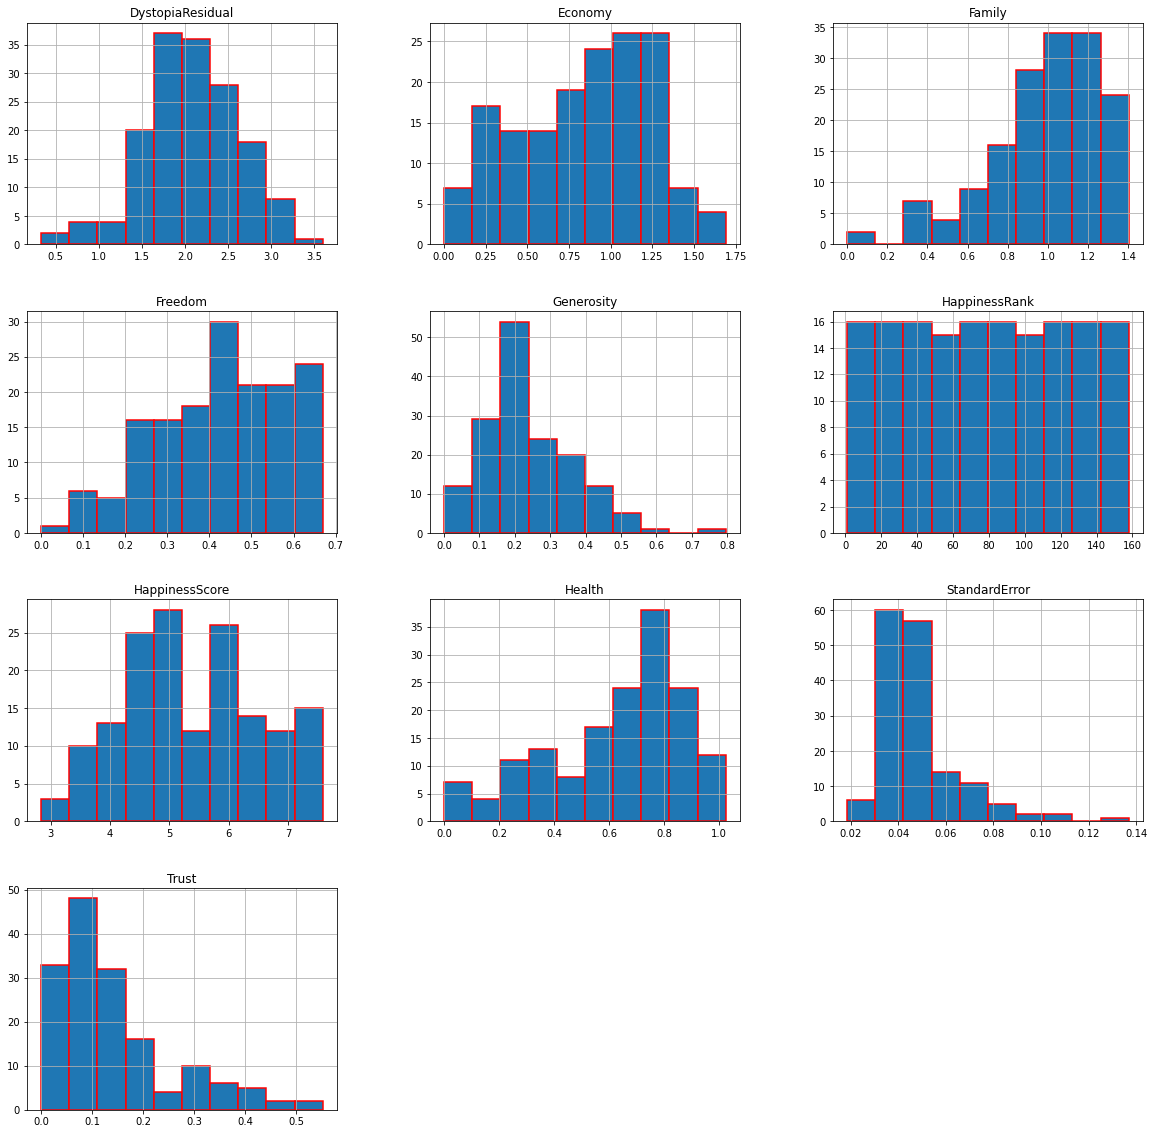

In [21]:
df.hist(edgecolor='red', linewidth=1.5,figsize=(20,20))

In [22]:
collist=df.columns.values
ncol=12
nrows=10

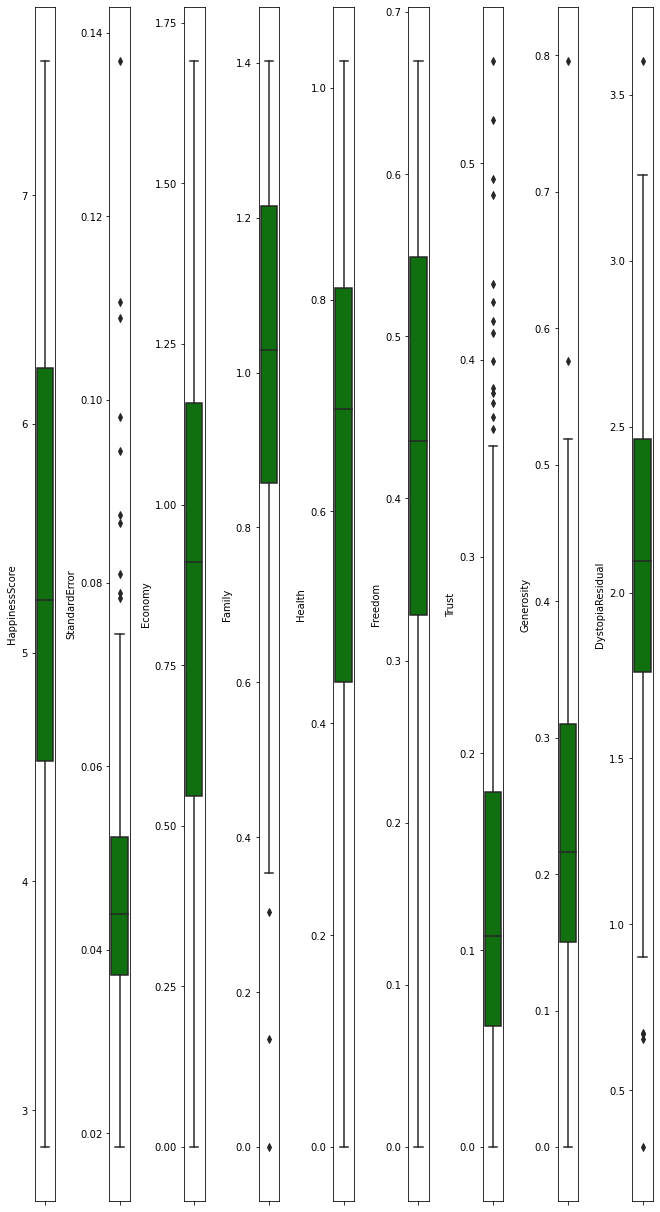

In [23]:
#code for checking the outliers
plt.figure(figsize=(ncol,14*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# DATA WRANGLING

In [24]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72099989, 1.93736005, 0.80592569, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.69907456, 1.91458063, 0.05588945, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.67714922, 1.88479215, 0.8544869 , ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.67742676, 2.0761992 , 0.13253425, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.69935209, 2.1646885 , 2.26396166, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.72127743, 2.22251319, 1.13418227, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [25]:
#to remove outliers we need threshold +3 and -3
threshold=3
print(np.where(z<3))

(array([  0,   0,   0, ..., 157, 157, 157], dtype=int64), array([0, 1, 2, ..., 7, 8, 9], dtype=int64))


In [26]:
df_new=df[(z<3).all(axis=1)]

In [27]:
df_new

,HappinessRank,HappinessScore,StandardError,Economy,Family,Health,Freedom,Trust,Generosity,DystopiaResidual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [28]:
df_new.shape

(149, 10)

In [29]:
percentage_loss=((158-149)/158)*100
percentage_loss

5.69620253164557

In [30]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

HappinessRank       78.500000
HappinessScore       1.717750
StandardError        0.015032
Economy              0.612640
Family               0.357582
Health               0.371828
Freedom              0.220762
Trust                0.118580
Generosity           0.159330
DystopiaResidual     0.703005
dtype: float64


In [31]:
df_new2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print(df_new2.shape)

(126, 10)


In [32]:
percentage_loss=((158-126)/158)*100
percentage_loss

20.253164556962027

In [33]:
#We will move forward qith Zscore because data is getting less lost.

In [34]:
x=df_new.drop('HappinessScore',axis=1)
y=df_new['HappinessScore']

In [35]:
#Let's remove skewness

In [36]:
df_new.skew()

HappinessRank       0.003268
HappinessScore      0.169740
StandardError       1.243048
Economy            -0.390657
Family             -0.811340
Health             -0.747711
Freedom            -0.400867
Trust               1.272530
Generosity          0.654710
DystopiaResidual   -0.021144
dtype: float64

In [37]:
#treating using log
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [38]:
df_new.skew()

HappinessRank       0.003268
HappinessScore      0.169740
StandardError       1.193808
Economy            -0.390657
Family             -0.811340
Health             -0.747711
Freedom            -0.400867
Trust               1.095190
Generosity          0.433539
DystopiaResidual   -0.021144
dtype: float64

In [39]:
#we will scale our data between 0 and 1 so that it can fit easily in our model

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [41]:
x

,HappinessRank,StandardError,Economy,Family,Health,Freedom,Trust,Generosity,DystopiaResidual
0,0.000000,0.196283,0.892961,0.952046,0.918244,0.993789,0.853038,0.514975,0.632017
1,0.006410,0.381263,0.832733,1.000000,0.924496,0.938841,0.287442,0.757071,0.694649
2,0.012821,0.185860,0.847542,0.962115,0.853099,0.969615,0.982666,0.592382,0.623420
3,0.019231,0.255180,0.932918,0.935163,0.863409,1.000000,0.741780,0.602100,0.614353
4,0.025641,0.214115,0.848060,0.927577,0.883326,0.945112,0.669722,0.794916,0.609756
...,...,...,...,...,...,...,...,...,...
144,0.961538,0.413538,0.297549,0.425967,0.148110,0.699775,0.364194,0.349905,0.258812
145,0.967949,0.310938,0.165048,0.499400,0.264570,0.589685,0.260760,0.377356,0.274997
146,0.974359,0.155218,0.204500,0.000000,0.295879,0.349604,0.197501,0.633524,0.440256
147,0.987179,0.227050,0.183291,0.046399,0.311241,0.723426,0.162772,0.316849,0.332103


In [42]:
x.skew()

HappinessRank       0.003268
StandardError       1.243048
Economy            -0.390657
Family             -0.811340
Health             -0.747711
Freedom            -0.400867
Trust               1.272530
Generosity          0.654710
DystopiaResidual   -0.021144
dtype: float64

# Inserting model and checking accuracy

In [43]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=42)

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(x_train,y_train)

LinearRegression()

In [47]:
lm.coef_

array([-1.30323199e-03,  1.52575258e-04,  1.56412698e+00,  1.09896560e+00,
        1.02432871e+00,  6.69019795e-01,  4.91967874e-01,  5.75904393e-01,
        2.94663649e+00])

In [48]:
lm.intercept_

0.9597267131684122

In [49]:
lm.score(x_train,y_train)

0.9999999360983661

In [50]:
#predict the value
pred=lm.predict(x_test)
print("predicted result price:",pred)
print("actual price",y_test)

predicted result price: [5.28622249 6.93730723 4.51205308 5.19244758 5.21217931 6.47672021
 5.60483722 3.78081018 5.47393922 5.12437819 4.6426033  7.19968077
 6.29824292 7.28383395 6.90138349 5.81266614 3.90376124 5.42878199
 5.82414144 4.03340427 6.50511922 4.332475   6.66963387 4.25198245
 4.21867195 3.65525069 4.63344079 4.78789151 5.97524339 6.48508391
 6.81027054 6.98250344 5.58866263 7.22540776 5.99529682 4.69380484
 5.85536841 6.57508676 7.42669766 6.4544717  4.41916532 5.09780456
 5.07325163 6.9462819  7.27751745 5.12894783 3.99487629 3.66737823
 5.25278045 4.67763036 4.87594267 4.71484303 5.54833077 7.58674073
 3.68087831 5.47709985 6.57406339 6.12268983 5.98388879 5.75460213
 4.35010237 6.78612826 6.7500592  6.79781353 4.89778005 6.13018865
 4.88464108 3.8448764  5.94833851 4.87428168 4.56460441 6.41145277
 4.85786837 3.58693156 5.69537803 5.10181157 4.43561996 5.83291269
 7.40589614 3.34009499 3.89688551 5.88893051 6.30235353 5.140423
 5.19379528 6.32897178 4.55074891 7.3634

In [51]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squarred error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.0002784476551108705
Mean squarred error: 1.1165578190044714e-07
Root Mean Squared Error: 0.00033414934071526633


In [52]:
# coefficient of determination is the proportion of the variance
#in the dependent variable that is predictable from the
#dependent variable
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9999999123342763


In [54]:

from sklearn.model_selection import cross_val_score

y_pred=lm.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy= {r2score*100},cross_val_score={cvscore*100} & difference ={(r2score*100)-(cvscore*100)}")

Accuracy= 99.99999123342764,cross_val_score=99.99998783276362 & difference =3.4006640134975896e-06


From the cross validation we can observe that the data is underfitted.

In [75]:
#saving the model
import pickle
filename='Project17.pkl'
pickle.dump(lm, open(filename, 'wb'))